
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [2]:
import pandas as pd
bank = pd.read_csv('../data/bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [21]:
# Perform what ever steps you need to familiarize yourself with the data:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usage: 675.9+ KB


In [4]:
bank.job.value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [5]:
bank.marital.value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [6]:
bank.loan.value_counts()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [64]:
# A:
X_num = bank[['age', 'duration']]
X_dum = pd.get_dummies(bank[['loan', 'marital', 'job']], drop_first=True)

In [65]:
X_dum.head()

,loan_unknown,loan_yes,marital_married,marital_single,marital_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
X = pd.concat([X_num, X_dum], axis = 1)

In [61]:
bank.education.value_counts().index

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype='object')

In [ ]:
bank.map({'university.degree': 0, ''})

In [12]:
X.head()

,age,duration,loan_unknown,loan_yes,marital_married,marital_single,marital_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,487,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,39,346,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,25,227,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,38,17,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,47,58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0



## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [15]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.metrics import accuracy_score

**Build a Model**  

In [67]:
# convert selected features do dummies
y = bank.y
# set the model
clf = LogisticRegression(solver = 'newton-cg')
# set x and y

# train test splot
X_train, X_test, y_train, y_test = train_test_split(X, y)
# fit model
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
for i, j in zip(X_test.columns, cos[:, 1]):
    print("The column {} has coef {}".format(i, j))

The column age has coef 0.004035458764909879


**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [76]:
# A:
preds = cross_val_predict(clf, X_test, y_test, cv = 5)

In [77]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
accuracy_score(y_test, preds)

0.8922330097087379

In [78]:
from sklearn.metrics import accuracy_score, classification_report

In [79]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       897
           1       0.60      0.23      0.33       133

   micro avg       0.88      0.88      0.88      1030
   macro avg       0.75      0.60      0.63      1030
weighted avg       0.86      0.88      0.86      1030



### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [36]:
# A;
X = bank[['age', 'duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.8922330097087379

In [38]:
probabs = pd.DataFrame(clf.predict(X_test))



### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [48]:
# A:
probabs['adj_probab'] = clf.predict_proba(X_test)[:, 1] > 0.3
probabs['adj_probab'] = probabs['adj_probab'].astype('int')

In [49]:
probabs.head()

,0,adj_probab
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**Visualize the distribution**

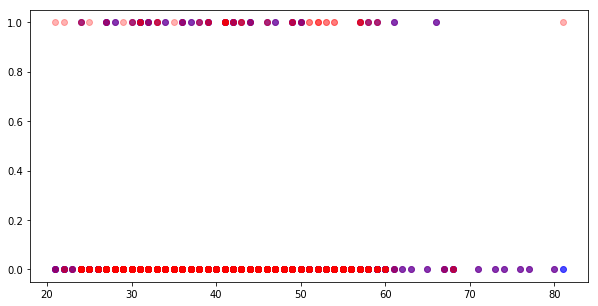

In [58]:
# A:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 5))
plt.plot(X_test['age'], probabs[0], 'bo', alpha = 0.7)
plt.plot(X_test['age'], probabs['adj_probab'], 'ro', alpha = 0.3)

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [ ]:
# A:

**Evaluate the model metrics now**

In [ ]:
# A:

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [ ]:
# A:

## Bonus: Use Regularization to optimize your model.

In [ ]:
# try using a for loop to test various regularization strengths 'C'